In [8]:
from nnsight import LanguageModel

# check layer count for each of these model sizes
models = {
    "1b": LanguageModel("meta-llama/Llama-3.2-1B", device_map="auto"),
    "3b": LanguageModel("meta-llama/Llama-3.2-3B", device_map="auto"),
    "8b": LanguageModel("meta-llama/Meta-Llama-3.1-8B", device_map="auto"),
}

for name, model in models.items():
    print(f"{name}: {len(model.model.layers)} layers")
    print(f"hidden size: {model.model.config.hidden_size}")
    print()

1b: 16 layers
hidden size: 2048

3b: 28 layers
hidden size: 3072

8b: 32 layers
hidden size: 4096



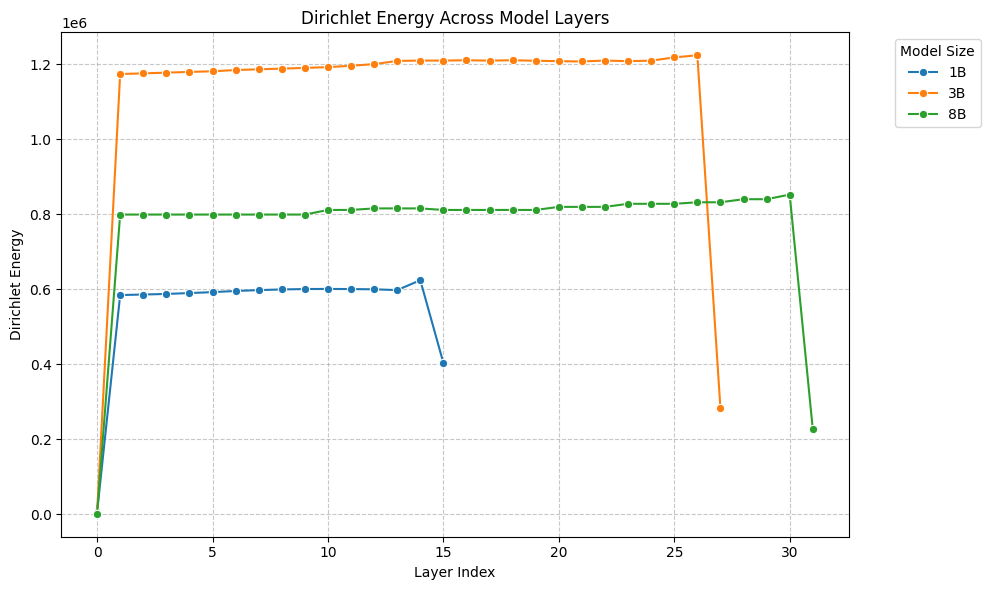

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import torch
from safetensors.torch import load_file
import pandas as pd


# Load the data
save_loc = Path("../results")
assert save_loc.exists()
model_sizes = ["1b", "3b", "8b"]
data = []

for model_name in model_sizes:
    tensors = load_file(save_loc / f"{model_name}.safetensors")
    energies = tensors["energies"].numpy()

    # Create DataFrame entries
    for layer_idx, energy in enumerate(energies):
        data.append(
            {
                "Model": model_name.upper(),
                "Layer": layer_idx,
                "Dirichlet Energy": energy,
            }
        )

# Create DataFrame
df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Layer", y="Dirichlet Energy", hue="Model", marker="o")

plt.title("Dirichlet Energy Across Model Layers")
plt.xlabel("Layer Index")
plt.ylabel("Dirichlet Energy")

# Add grid
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust legend
plt.legend(title="Model Size", bbox_to_anchor=(1.05, 1), loc="upper left")

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(save_loc / "dirichlet_energy_plot.png", dpi=300, bbox_inches="tight")
plt.show()


1b: 16 layers
hidden size: 2048

3b: 28 layers
hidden size: 3072

8b: 32 layers
hidden size: 4096

